In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [4]:
df=pd.read_csv('bengaluru_house_prices.csv')

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
for col in df.columns:
    print(df[col].value_counts())
    print("****")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
****
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
****
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
****
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826


In [13]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [15]:
df1=df.drop(['availability','area_type','society','balcony'],axis=1)

In [16]:
df1.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [23]:
df1.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [24]:
df1['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [25]:

df1['size']=df1['size'].fillna(df1['size'].median)
df1['bath']=df1['bath'].fillna(df1['bath'].median)

In [26]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [27]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [28]:
df1['size'].value_counts()

size
2 BHK                                                                                                                                                                                                                                                                                                   5199
3 BHK                                                                                                                                                                                                                                                                                                   4310
4 Bedroom                                                                                                                                                                                                                                                                                                826
4 BHK                                                                                       

In [ ]:
ok=df1['size'].str.split(' ')


ValueError: cannot convert float NaN to integer

In [53]:
df1.dropna(inplace=True)


In [54]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [58]:
df1['bhk']=df1['bhk'].astype('int64')

In [60]:
df1[df1['bhk']>20]


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [61]:
df1.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [62]:
df1['total_sqft'].value_counts()

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2110, dtype: int64

In [65]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [67]:
def remove(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [68]:
df2=df1

In [70]:
df2['total_sqft']=df2['total_sqft'].apply(remove)

In [74]:
df2['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [76]:
df2['Price_per_sqrt']=df2['price']*100000/df2['total_sqft']

In [77]:
df2

,location,size,total_sqft,bath,price,bhk,Price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [78]:
df2.describe()

,total_sqft,price,bhk,Price_per_sqrt
count,13258.000000,13304.000000,13304.000000,1.325800e+04
mean,1558.812282,112.582035,2.803743,7.912634e+03
std,1238.432276,148.988398,1.294974,1.064936e+05
min,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,50.000000,2.000000,4.271229e+03
50%,1275.000000,72.000000,3.000000,5.438331e+03
75%,1680.000000,120.000000,3.000000,7.313266e+03
max,52272.000000,3600.000000,43.000000,1.200000e+07


In [80]:
df2['bath'].astype('int64')

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'method'

In [87]:
df2['bath'].info()


<class 'pandas.core.series.Series'>
Index: 13304 entries, 0 to 13319
Series name: bath
Non-Null Count  Dtype 
--------------  ----- 
13304 non-null  object
dtypes: object(1)
memory usage: 207.9+ KB


In [88]:
df2[~df2['bath'].str.replace(r'\d+', '', regex=True).str.strip().eq('')]


AttributeError: Can only use .str accessor with string values!

In [90]:
df2['bath']=pd.to_numeric(df2['bath'], errors='coerce')


In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13304 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13304 non-null  object 
 1   size            13304 non-null  object 
 2   total_sqft      13258 non-null  float64
 3   bath            13247 non-null  float64
 4   price           13304 non-null  float64
 5   bhk             13304 non-null  int64  
 6   Price_per_sqrt  13258 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 831.5+ KB


In [95]:
df2['bath'].dropna(inplace=True)

In [96]:
df2['location'].value_counts()

location
Whitefield                        539
Sarjapur  Road                    397
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [ ]:
df2['location']=df2['location'].apply(lambda x:x.strip())

df2['location'].value_counts()

AttributeError: 'function' object has no attribute 'strip'

In [101]:
print(df2['location'].dtype)


object


In [102]:
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [103]:
df2['location'].apply(lambda x: type(x)).value_counts()


location
<class 'str'>       13303
<class 'method'>        1
Name: count, dtype: int64

In [104]:
df2[df2['location'].apply(lambda x: isinstance(x, type(df2['location'].strip)))]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Abdul_Razzaq\AppData\Local\Temp\ipykernel_18040\1861602992.py", line 1, in <module>
    df2[df2['location'].apply(lambda x: isinstance(x, type(df2['location'].strip)))]
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\series.py", line 4924, in apply
    ).apply()
      ^^^^^^^
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\apply.py", line 1427, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\apply.py", line 1507, in apply_standar

In [105]:
 df2['location'].apply(lambda x: str(x) if not isinstance(x, type(df2['location'].strip)) else None)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Abdul_Razzaq\AppData\Local\Temp\ipykernel_18040\1788818286.py", line 1, in <module>
    df2['location'].apply(lambda x: str(x) if not isinstance(x, type(df2['location'].strip)) else None)
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\series.py", line 4924, in apply
    ).apply()
      ^^^^^^^
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\apply.py", line 1427, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\apply.py", line 1507, in apply_standard
    mapped = obj._map_values(
             ^^^^^^^^^^^^^^^^
  F

In [106]:
df2[df2['location'].apply(lambda x: isinstance(x, type(df2['location'].strip)))]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Abdul_Razzaq\AppData\Local\Temp\ipykernel_18040\1861602992.py", line 1, in <module>
    df2[df2['location'].apply(lambda x: isinstance(x, type(df2['location'].strip)))]
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\series.py", line 4924, in apply
    ).apply()
      ^^^^^^^
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\apply.py", line 1427, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\apply.py", line 1507, in apply_standar

In [107]:
df2[df2['location'].apply(lambda x: not isinstance(x, str))]


,location,size,total_sqft,bath,price,bhk,Price_per_sqrt
568,<bound method Series.median of 0 Electr...,3 BHK,1600.0,3.0,86.0,3,5375.0


In [108]:
df2 = df2[df2['location'].apply(lambda x: isinstance(x, str))]


In [109]:
df2['location'].apply(lambda x: type(x)).value_counts()

location
<class 'str'>    13303
Name: count, dtype: int64

In [112]:
df2['location']=df2['location'].apply(lambda x:x.strip())
count=df2['location'].value_counts()

C:\Users\Abdul_Razzaq\AppData\Local\Temp\ipykernel_18040\52514340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location']=df2['location'].apply(lambda x:x.strip())


In [116]:
count=count[count<=10]

In [117]:
df2['location']=df2['location'].apply(lambda x:'other' if x in count else x)

C:\Users\Abdul_Razzaq\AppData\Local\Temp\ipykernel_18040\3738252108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location']=df2['location'].apply(lambda x:'other' if x in count else x)


In [119]:
df2['location'].value_counts()

location
other                 2882
Whitefield             540
Sarjapur  Road         397
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [120]:
df2.describe()

,total_sqft,bath,price,bhk,Price_per_sqrt
count,13257.000000,13246.000000,13303.000000,13303.000000,1.325700e+04
mean,1558.809175,2.692586,112.584033,2.803728,7.912825e+03
std,1238.478935,1.341506,148.993820,1.295022,1.064976e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.271186e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438596e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.313318e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [122]:
(df2['total_sqft']/df2['bhk']).describe()

count    13257.000000
mean       574.423690
std        387.598667
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [124]:
df3=df2[((df2['total_sqft']/df2['bhk'])>=300)]

In [125]:
df3.describe()

,total_sqft,bath,price,bhk,Price_per_sqrt
count,12513.000000,12456.000000,12513.000000,12513.000000,12513.000000
mean,1593.745883,2.562781,111.400362,2.651642,6307.441644
std,1261.402072,1.080275,152.104715,0.977059,4160.931610
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5295.007564
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [126]:
df3.shape

(12513, 7)

In [127]:
df3['Price_per_sqrt'].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: Price_per_sqrt, dtype: float64

<Axes: ylabel='Price_per_sqrt'>

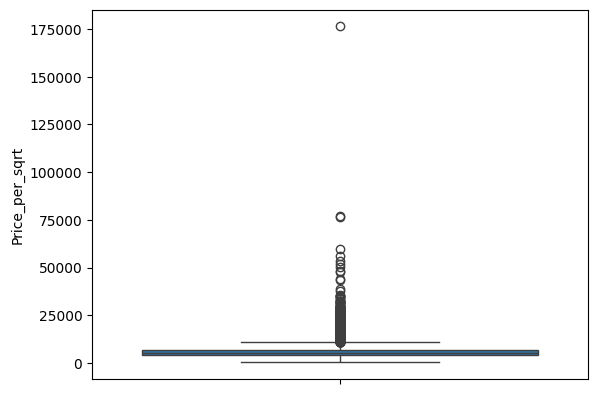

In [128]:
sns.boxplot(df3['Price_per_sqrt'])

In [132]:
def remove(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf['Price_per_sqrt'])
        sd=np.std(subdf['Price_per_sqrt'])
        gen_df=subdf[(subdf['Price_per_sqrt'] > (m-sd)) & (subdf['Price_per_sqrt'] <= (m+sd))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)

    return df_output
df4=remove(df3)
df4.describe()

,total_sqft,bath,price,bhk,Price_per_sqrt
count,10286.000000,10235.000000,10286.000000,10286.000000,10286.000000
mean,1507.539685,2.473962,91.250812,2.574859,5659.999439
std,879.997706,0.981548,86.320703,0.898108,2265.627947
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1109.000000,2.000000,49.000000,2.000000,4250.000000
50%,1285.000000,2.000000,67.000000,2.000000,5176.359705
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [129]:
df3.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'Price_per_sqrt'],
      dtype='object')

In [133]:
df3.groupby('location')

In [134]:
def bhk(df):
    exclude=np.array([])
    for key,subdf in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in subdf.groupby('bhk'):
            bhk_stats[bhk]={'mean':np.mean(bhk_df['Price_per_sqrt']),'std':np.std(bhk_df['Price_per_sqrt']),'count':bhk_df.shape[0]}
        for bhk,bhk_df in subdf.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                
              exclude=np.append(exclude,bhk_df[bhk_df['Price_per_sqrt']<(stats['mean'])].index.values)
    return df.drop(exclude,axis='index')

In [139]:
df4=bhk(df4)

In [140]:
df4.shape

(7353, 7)

In [143]:
df4=df4.drop(['size','Price_per_sqrt'],axis=1)

In [144]:
df4

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10277,other,1200.0,2.0,70.0,2
10278,other,1800.0,1.0,200.0,1
10281,other,1353.0,2.0,110.0,2
10282,other,812.0,1.0,26.0,1


In [163]:
df4.to_csv('cleaned_data1.csv')

In [164]:
x=df4.drop('price',axis=1)
y=df4['price']

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [166]:
x_test

,location,total_sqft,bath,bhk
380,Ambedkar Nagar,1409.0,2.0,2
6689,Thanisandra,1697.0,3.0,3
4551,Kogilu,2456.0,7.0,7
8066,other,2150.0,4.0,3
2137,Electronic City,1060.0,2.0,2
...,...,...,...,...
5220,NRI Layout,1125.0,2.0,2
664,Balagere,1007.0,2.0,2
10006,other,500.0,1.0,1
1046,Begur Road,1410.0,2.0,3


In [167]:
y_test

380       95.00
6689     110.00
4551      85.00
8066     240.00
2137      55.00
          ...  
5220      45.56
664       67.00
10006     13.00
1046      52.17
9096      75.00
Name: price, Length: 1465, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

col_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['location']),
    remainder='passthrough'
)

scalar=StandardScaler()
lr=LinearRegression()
pipe=make_pipeline(col_trans,lr)
pipe.fit(x_train,y_train)
r2_score(y_test,y_pred)

In [169]:
scalar=StandardScaler()
lr=LinearRegression()

In [170]:
pipe=make_pipeline(col_trans,lr)

In [171]:
pipe.fit(x_train,y_train)

c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('linearregression', LinearRegression())])

In [162]:
df4.dropna(inplace=True)

In [174]:
r2_score(y_test,y_pred)

0.7772789654053882

In [173]:
y_pred=pipe.predict(x_test)

In [175]:
lasso=Lasso()

In [176]:
pipe1=make_pipeline(col_trans,lasso)

In [177]:
pipe1.fit(x_train,y_train)

c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('lasso', Lasso())])

In [178]:
ok=pipe1.predict(x_test)

In [179]:
r2_score(y_test,ok)

0.6308659356073336

In [180]:
ridge=Ridge()

In [181]:
pipe2=make_pipeline(col_trans,ridge)

In [182]:
pipe2.fit(x_train,y_train)

c:\Users\Abdul_Razzaq\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('ridge', Ridge())])

In [183]:
okk=pipe2.predict(x_test)

In [184]:
r2_score(y_test,okk)

0.7704398584121279

In [185]:
import pickle

In [187]:
with open("House_price_pred",'wb') as f:
    pickle.dump(pipe,f)